# **Import Libraries**

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer

# **Load Data**

In [167]:
data = pd.read_csv('/content/drive/MyDrive/astronauts.csv')

# **Copy Data As dataframe**

In [168]:
df = data.copy()

In [169]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [170]:
df.describe()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

# **Data Preprocessing**

## **Convert Date Columns to Datetime Format**

In [172]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
df['Death Date'] = pd.to_datetime(df['Death Date'], errors='coerce')

## **Missing Values**

In [173]:
df.isnull().sum()

,0
Name,0
Year,27
Group,27
Status,0
Birth Date,0
Birth Place,0
Gender,0
Alma Mater,1
Undergraduate Major,22
Graduate Major,59


<Axes: >

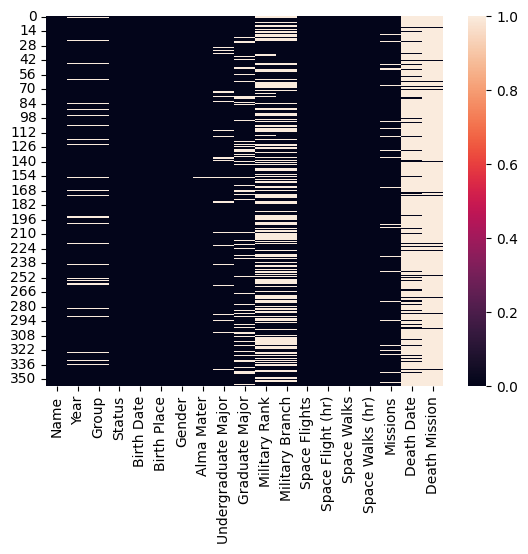

In [174]:
sns.heatmap(df.isnull())

## **Drop the most null columns**

In [175]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Military Rank', 'Military Branch', 'Space Flights',
       'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions',
       'Death Date', 'Death Mission'],
      dtype='object')

In [176]:
df.drop(['Death Date', 'Death Mission'], axis=1, inplace=True)

## **Use KNN Imputation to fill numerical columns**

In [177]:
numerical_cols = ['Year', 'Group']
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = pd.DataFrame(knn_imputer.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [178]:
df.isnull().sum()

,0
Name,0
Year,0
Group,0
Status,0
Birth Date,0
Birth Place,0
Gender,0
Alma Mater,1
Undergraduate Major,22
Graduate Major,59


<Axes: >

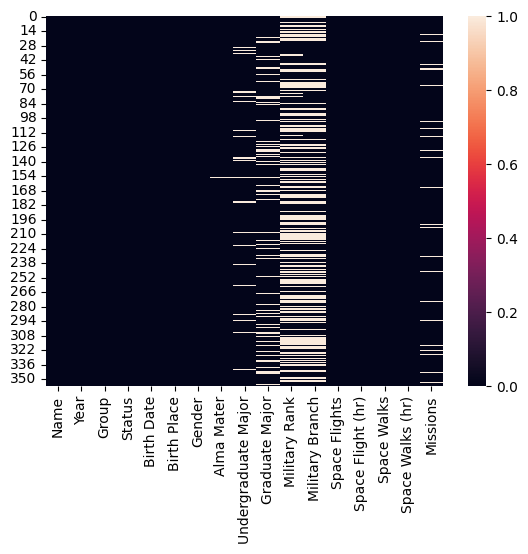

In [179]:
sns.heatmap(df.isnull())

## **Check Year and Group format**

In [180]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions
0,Joseph M. Acaba,2004.000000,19.000000,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,Loren W. Acton,1985.106061,11.409091,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger)
2,James C. Adamson,1984.000000,10.000000,Retired,1946-03-03,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)"
3,Thomas D. Akers,1987.000000,12.000000,Retired,1951-05-20,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,Buzz Aldrin,1963.000000,3.000000,Retired,1930-01-20,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11"


In [181]:
df['Year'] = df['Year'].round()
df['Group'] = df['Group'].round()

In [182]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions
0,Joseph M. Acaba,2004.0,19.0,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,Loren W. Acton,1985.0,11.0,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger)
2,James C. Adamson,1984.0,10.0,Retired,1946-03-03,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)"
3,Thomas D. Akers,1987.0,12.0,Retired,1951-05-20,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,Buzz Aldrin,1963.0,3.0,Retired,1930-01-20,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11"


## **Use mode and mean with fillna to fill categorical columns**

In [183]:
df["Alma Mater"].fillna(df["Alma Mater"].mode()[0], inplace=True)
df["Undergraduate Major"].fillna(df["Undergraduate Major"].mode()[0], inplace=True)
df["Graduate Major"].fillna(df["Graduate Major"].mode()[0], inplace=True)
df["Military Rank"].fillna(df["Military Rank"].mode()[0], inplace=True)
df["Military Branch"].fillna(df["Military Branch"].mode()[0], inplace=True)
df["Missions"].fillna(df["Missions"].mode()[0], inplace=True)

In [184]:
df.isnull().sum()

,0
Name,0
Year,0
Group,0
Status,0
Birth Date,0
Birth Place,0
Gender,0
Alma Mater,0
Undergraduate Major,0
Graduate Major,0


<Axes: >

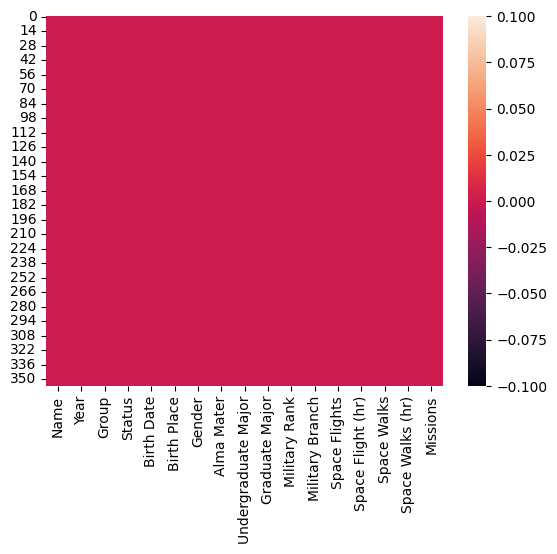

In [185]:
sns.heatmap(df.isnull())

In [186]:
df.duplicated().sum()

0

# **Data Analysis and visualization**

# **1) How many astrounauts are male and female?**

In [187]:
Gender = pd.Series({'Male': 307, 'Female': 50})

color_mapping = {'Female': '#9df05d',  # Pink for Female
                 'Male': '#1f77b4'}
#9df05d
fig = px.pie(Gender,
             names=Gender.index,
             values=Gender.values,
             title='Gender Distribution of Astronauts',
             color=Gender.index,
             color_discrete_map=color_mapping)  # Custom colors for each category
fig.show()

# **2) Grouping by gender and calculating the total number of space flights**

In [188]:
gender_space_flights = data.groupby('Gender')['Space Flights'].sum().sort_values(ascending=False).reset_index()

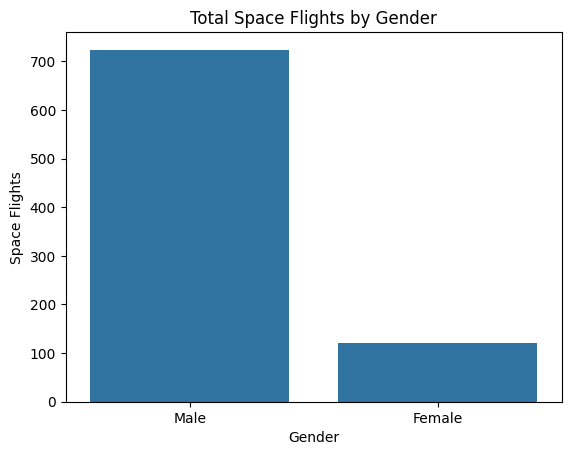

In [189]:
sns.barplot(x='Gender', y='Space Flights', data=gender_space_flights)
plt.title('Total Space Flights by Gender')
plt.show()

## **3) What is the average number of space walks by status (Active/Retired)?**

In [190]:
status_space_walks = data.groupby('Status')['Space Walks'].mean().reset_index()
fig = px.bar(status_space_walks,
             x='Status',
             y='Space Walks',
             color='Status',  # Assign different colors based on 'Status'
             title='Average Space Walks by Status')
fig.show()

## **4) What is the distribution of birth years among astronauts?**

In [191]:
data['Birth Year'] = pd.to_datetime(data['Birth Date']).dt.year

# Creating the histogram with KDE
fig = px.histogram(data, x='Birth Year', nbins=20,
                   title='Distribution of Astronaut Birth Years',
                   marginal='violin',  # Adds a violin plot as marginal
                   opacity=0.75)


fig.add_traces(px.density_contour(data, x='Birth Year').data)
fig.update_layout(
    xaxis_title='Birth Year',
    yaxis_title='Frequency'
)
fig.show()

## **5)Grouping by 'Year' and counting the number of astronauts**

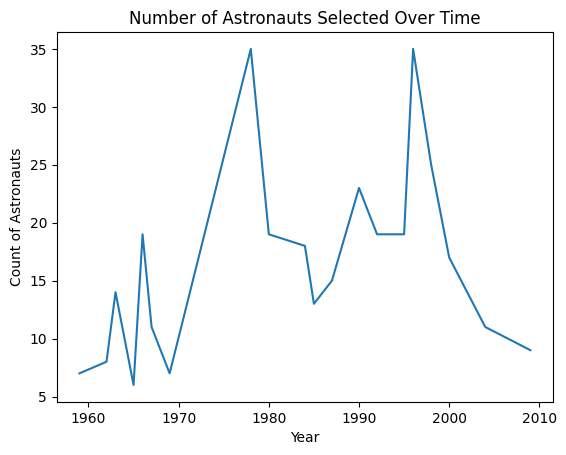

In [210]:

yearly_astronauts = data.groupby('Year')['Name'].count().reset_index().sort_values(by='Year')

sns.lineplot(x='Year', y='Name', data=yearly_astronauts)
plt.title('Number of Astronauts Selected Over Time')
plt.ylabel('Count of Astronauts')
plt.show()

## **6)What is the relationship between space flight hours and space walk hours?**

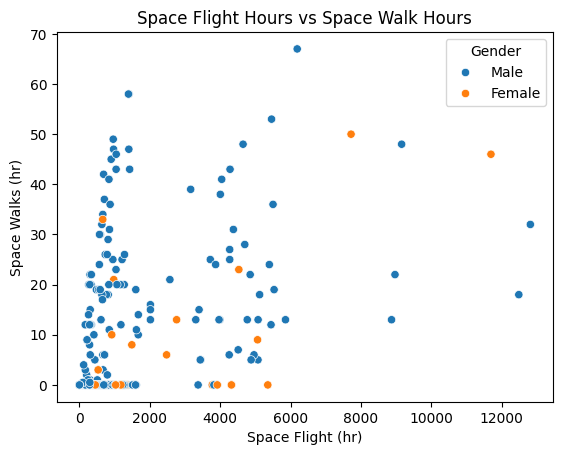

In [193]:
sns.scatterplot(x='Space Flight (hr)', y='Space Walks (hr)', hue='Gender', data=data)
plt.title('Space Flight Hours vs Space Walk Hours')
plt.xlabel('Space Flight (hr)')
plt.ylabel('Space Walks (hr)')
plt.show()

## **7)How does military rank affect the number of space flights?**

In [209]:
military_space_flights = data.groupby('Military Rank')['Space Flights'].sum().reset_index().sort_values(by='Space Flights', ascending=False)

color_map = {
    'Colonel': 'blue',
    'Major': 'orange',
    'Captain': 'green',
    'Lieutenant': 'red',
    'General': 'purple'
}

fig = px.bar(military_space_flights,
             x='Space Flights',
             y='Military Rank',
             title='Space Flights by Military Rank',
             labels={'Space Flights': 'Total Space Flights', 'Military Rank': 'Military Rank'},
             color='Military Rank',  # Color by military rank
             color_discrete_map=color_map)  # Use the defined color map

fig.show()

## **8) Which American Astronaut has spent the most time in Space?**

Text(0, 0.5, 'Time in Space')

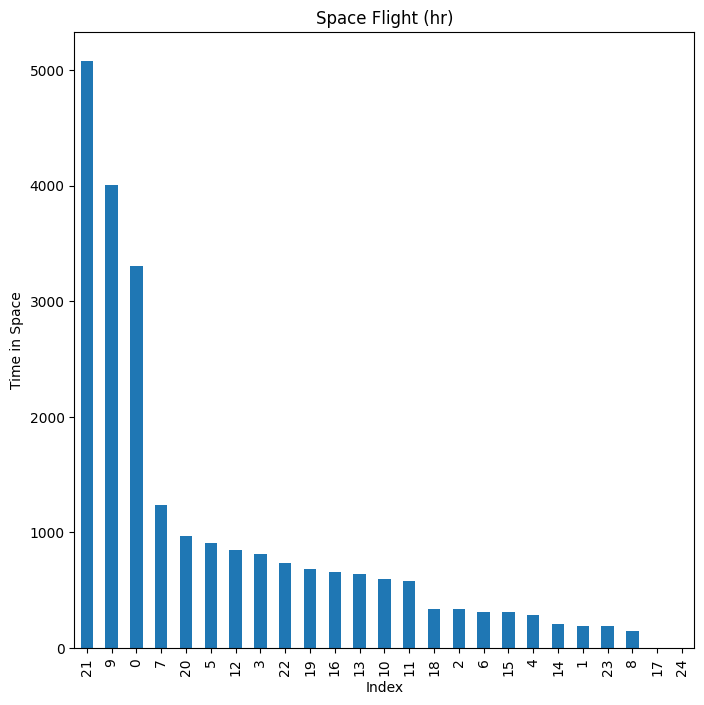

In [195]:
plt.figure(figsize=(8,8))
data['Space Flight (hr)'].head(25).sort_values(ascending=False).plot.bar()
plt.title('Space Flight (hr)')
plt.xlabel('Index')
plt.ylabel('Time in Space')

## **9)What university has produced the most astronauts?**

<ipython-input-196-d6f0ab7689b9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




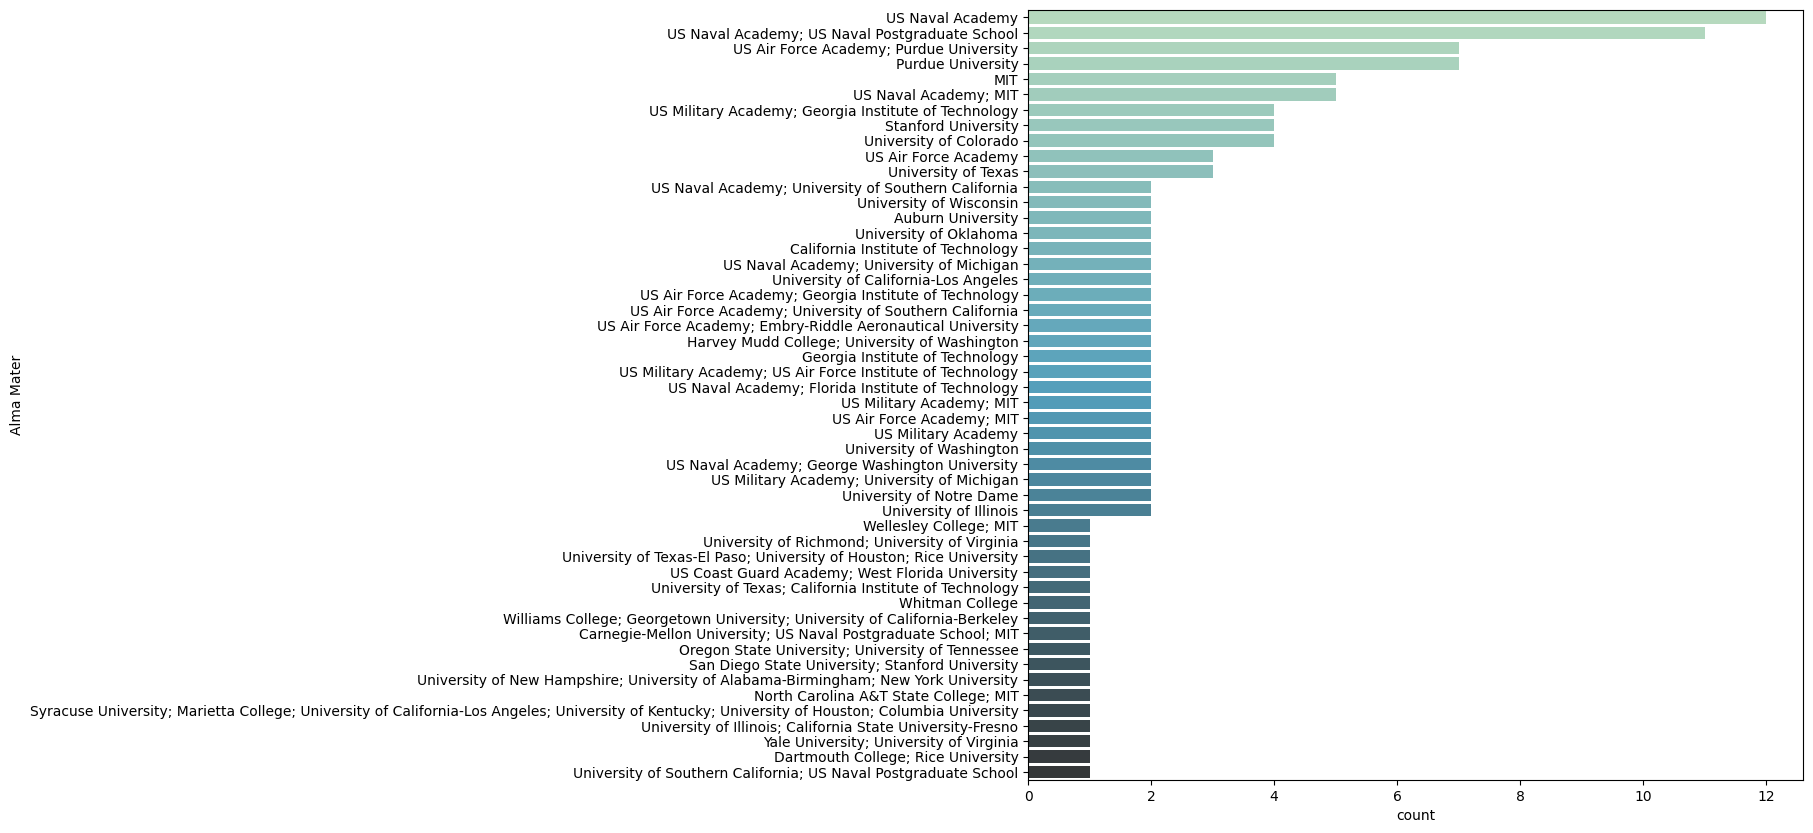

In [196]:
countCollege=data["Alma Mater"].value_counts()
plt.figure(figsize=(10,10))
UniversitiesGraph = sns.countplot(y="Alma Mater", data=data,
                   order=countCollege.nlargest(50).index,
                   palette='GnBu_d')
plt.show()


## **10)What subject did the most astronauts major in at college?**

<ipython-input-197-176423a81db0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




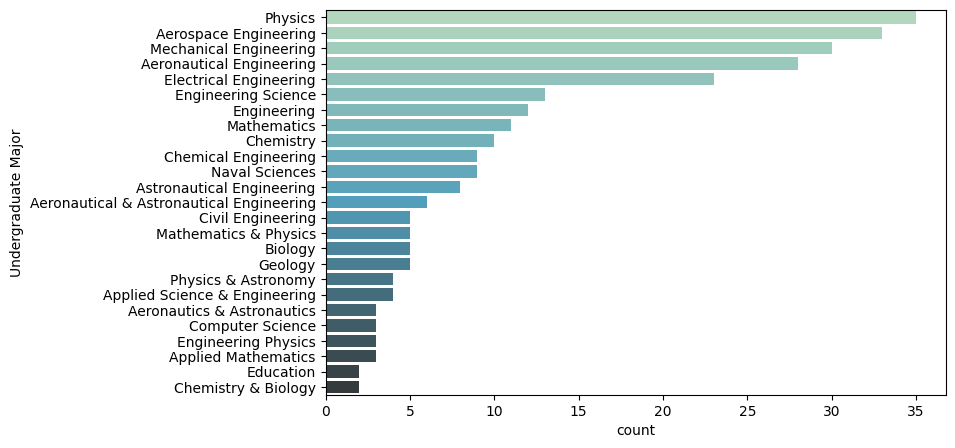

In [197]:
CollegeCount = data['Undergraduate Major'].value_counts().head(25)
plt.figure(figsize=(8,5))
CollegeGraph = sns.countplot(y="Undergraduate Major", data=data,
                   order=CollegeCount.index,
                   palette='GnBu_d')
plt.show()



## **11)What is the gender ratio across different astronaut groups?**

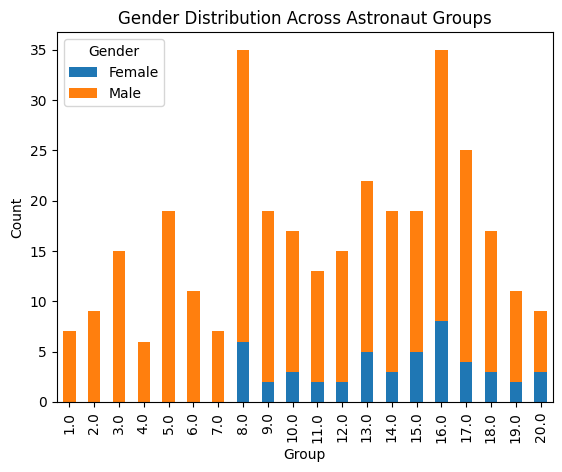

In [198]:
group_gender = data.groupby(['Group', 'Gender']).size().unstack().fillna(0)

group_gender.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Astronaut Groups')
plt.ylabel('Count')
plt.show()

# **12)How does the number of space walks change across different astronaut groups?**

In [199]:
group_space_walks = data.groupby('Group')['Space Walks'].sum().reset_index()

fig = px.line(group_space_walks,
               x='Group',
               y='Space Walks',
               title='Total Space Walks Across Astronaut Groups',
               labels={'Space Walks': 'Total Space Walks', 'Group': 'Astronaut Group'},
               markers=True)

fig.update_layout(
    xaxis_title='Astronaut Group',
    yaxis_title='Total Space Walks',
    showlegend=False  # Hide legend if not needed
)
fig.show()

## **13) What is the distribution of astronauts based on their military branches?**

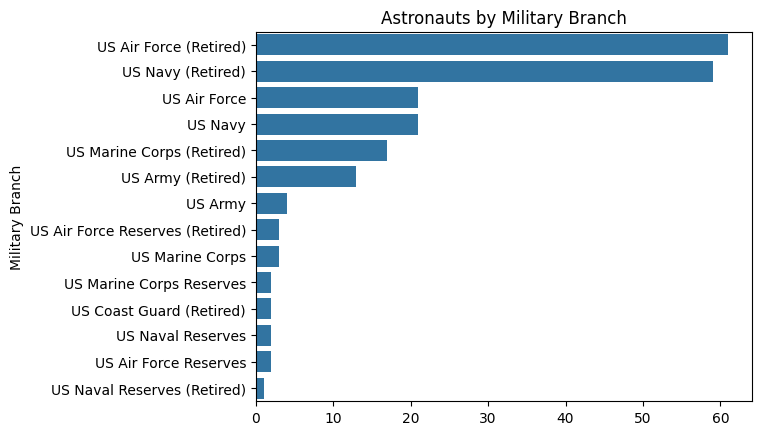

In [200]:
military_branch_counts = data['Military Branch'].value_counts()

# Plotting
sns.barplot(x=military_branch_counts.values, y=military_branch_counts.index)
plt.title('Astronauts by Military Branch')
plt.show()

## **14) How many astrounauts went to a Graduate School?**

In [201]:
print("Total out of 356: ", data['Graduate Major'].count(), "has a Graduate Degree")
graduateCount = data['Graduate Major'].count()
result = graduateCount/356 * 100
result = format(result, '.2f')
print(result, '%')

print(data['Graduate Major'].value_counts())

Total out of 356:  298 has a Graduate Degree
83.71 %
Graduate Major
Aeronautical Engineering                      27
Aerospace Engineering                         21
Medicine                                      16
Physics                                       15
Mechanical Engineering                        13
                                              ..
Engineering Mechanics; Business Management     1
Information Systems                            1
Public Health; Medicine                        1
Aeronautical Engineering Systems               1
Physics; Business Management                   1
Name: count, Length: 143, dtype: int64


## **15) Is there a relationship between undergraduate major and number of space flights?**

In [202]:
major_space_flights = data.groupby('Undergraduate Major')['Space Flights'].sum().reset_index()

top_10_major_space_flights = major_space_flights.sort_values(by='Space Flights', ascending=False).head(10)
fig = px.bar(top_10_major_space_flights,
             x='Space Flights',
             y='Undergraduate Major',
             title='Top 10 Undergraduate Majors by Total Space Flights',
             labels={'Space Flights': 'Total Space Flights', 'Undergraduate Major': 'Undergraduate Major'},
             color='Space Flights',  # Color by the number of space flights
             color_continuous_scale=px.colors.sequential.Viridis)  # Using the Viridis color scale

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Total Space Flights',
    yaxis_title='Undergraduate Major',
    yaxis=dict(autorange='reversed'),  # Reverse y-axis for better visual order
    showlegend=False  # Hide legend if not needed
)
fig.show()

## **16) How does the number of space flights vary by alma mater?**

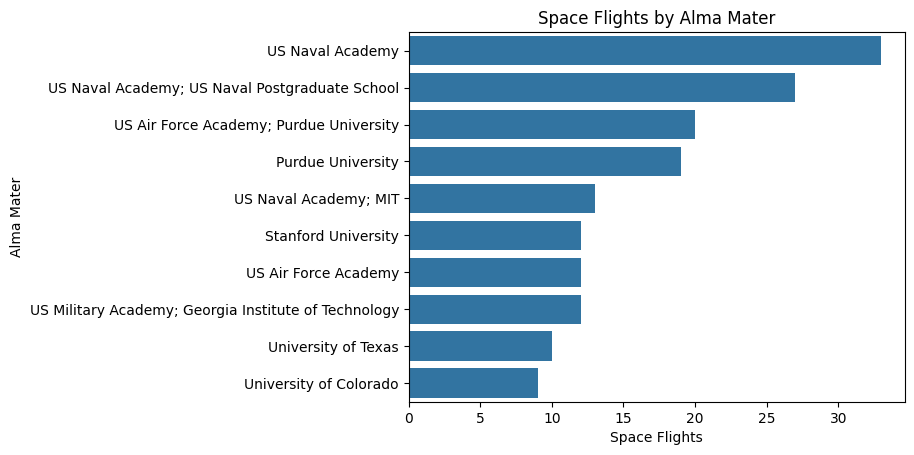

In [203]:
alma_mater_space_flights = data.groupby('Alma Mater')['Space Flights'].sum().nlargest(10).reset_index()

sns.barplot(x='Space Flights', y='Alma Mater', data=alma_mater_space_flights)
plt.title('Space Flights by Alma Mater')
plt.show()

# **17)How does the number of missions vary across different astronaut groups?**

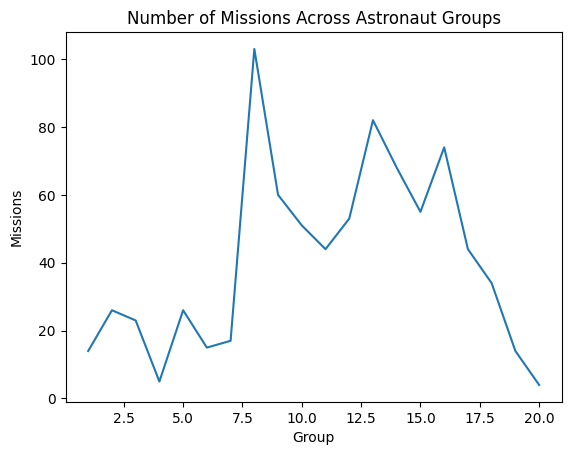

In [204]:
group_missions = data.groupby('Group')['Missions'].apply(lambda x: x.str.split(',').str.len().sum()).reset_index()

sns.lineplot(x='Group', y='Missions', data=group_missions)
plt.title('Number of Missions Across Astronaut Groups')
plt.show()

# **18) How many astronauts participated in more than 5 spacewalks?**

In [205]:
# Assuming 'data' is your DataFrame
astronauts_5_spacewalks = data[data['Space Walks'] > 5]['Name'].count()

print(f'Number of astronauts with more than 5 spacewalks: {astronauts_5_spacewalks}')

# Create the data for the pie chart
spacewalk_data = pd.DataFrame({
    'Condition': ['More than 5 Spacewalks', '5 or Fewer Spacewalks'],
    'Count': [astronauts_5_spacewalks, data.shape[0] - astronauts_5_spacewalks]
})

# Creating a pie chart with blue and green colors
fig = px.pie(spacewalk_data,
             values='Count',
             names='Condition',
             title='Proportion of Astronauts Based on Spacewalks',
             color='Condition',
             color_discrete_map={'More than 5 Spacewalks': '#1f77b4',  # Blue for more than 5
                                 '5 or Fewer Spacewalks': '#9df05d'})  # Green for 5 or fewer

# Show the plot
fig.show()

Number of astronauts with more than 5 spacewalks: 24


## **19) How does birth location (state) impact the number of space flights?**

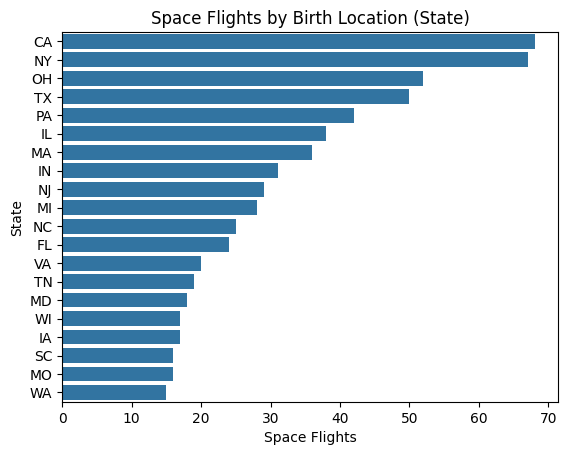

In [206]:
# Extracting state from birth place and grouping by state
data['State'] = data['Birth Place'].apply(lambda x: x.split(',')[-1].strip())
state_space_flights = data.groupby('State')['Space Flights'].sum().reset_index().sort_values(by='Space Flights', ascending=False).head(20)

sns.barplot(x='Space Flights', y='State', data=state_space_flights)
plt.title('Space Flights by Birth Location (State)')
plt.show()

## **20)  What is the total number of space flights for deceased astronauts?**

In [235]:
spacewalk_hours_over_time = data.groupby('Year')['Space Walks (hr)'].sum().reset_index()

# Creating a line plot to visualize the trend of spacewalk hours over time
fig = px.line(spacewalk_hours_over_time,
              x='Year',
              y='Space Walks (hr)',
              title='Total Spacewalk Hours Over Time',
              labels={'Space Walk (hr)': 'Total Spacewalk Hours'},
              markers=True,  # Add markers to the line plot
              color_discrete_sequence=['purple'])

# Show the plot
fig.show()

# **21)  How does the number of spacewalks vary by alma mater?**

In [208]:
# Grouping by Alma Mater and summing the Space Walks
alma_spacewalks = data.groupby('Alma Mater')['Space Walks'].sum().reset_index().sort_values('Space Walks', ascending=False).head(10)

fig = px.pie(alma_spacewalks,
             names='Alma Mater',
             values='Space Walks',
             title='Total Spacewalks by Alma Mater',
             color='Alma Mater',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

## **22)What is the average number of missionsper year?**

In [219]:
data['Missions'] = pd.to_numeric(data['Missions'], errors='coerce')

# Grouping by Year to calculate the average number of missions
average_missions_per_year = data.groupby('Year')['Missions'].sum().reset_index().sort_values(by='Year')
fig = px.pie(average_missions_per_year,
             values='Missions',
             names='Year',
             title='Average Number of Missions per Year',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

# **23) How many astronauts died during space missions?**

In [222]:
# Filtering for deceased astronauts
deceased_astronauts = data[data['Status'] == 'Deceased']

# Count the number of deceased astronauts
num_deceased_astronauts = len(deceased_astronauts)

# Print the result
print(f'Number of astronauts who died during space missions: {num_deceased_astronauts}')

# Creating a pie chart to visualize the status of astronauts
status_counts = data['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

fig = px.pie(status_counts,
             names='Status',
             values='Count',
             title='Astronaut Status Distribution',
             color='Status',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig.show()

Number of astronauts who died during space missions: 51


## **24)Military vs Non-Military**

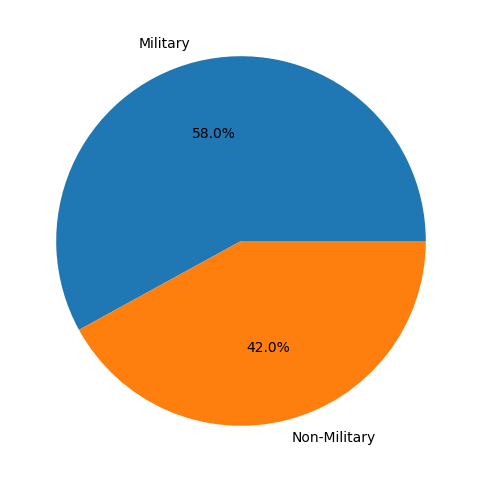

In [223]:
A = [207, 150]
plt.figure(figsize=(6,6))
plt.pie(A, autopct = '%1.1f%%',labels=("Military","Non-Military"))
plt.show()

## **25) How many male astronauts and female astronauts who died during their missions?**

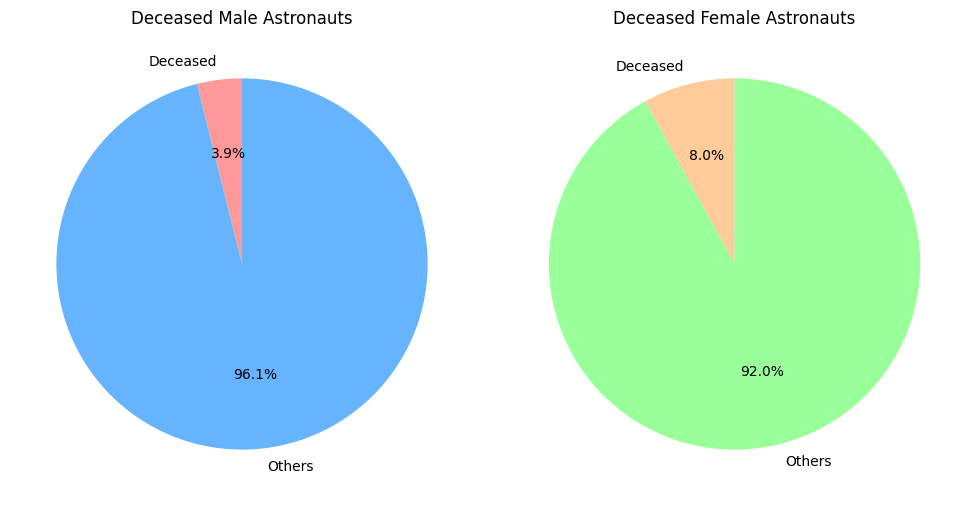

In [226]:
deceased_during_mission = data[data['Death Mission'].notna()]

# Splitting data by gender for deceased astronauts
deceased_male = deceased_during_mission[deceased_during_mission['Gender'] == 'Male']
deceased_female = deceased_during_mission[deceased_during_mission['Gender'] == 'Female']

# Plotting pie chart for deceased male astronauts
plt.figure(figsize=(10, 5))

# Subplot 1: Male astronauts
plt.subplot(1, 2, 1)
labels_male = ['Deceased', 'Others']
sizes_male = [len(deceased_male), len(data[(data['Gender'] == 'Male')]) - len(deceased_male)]
plt.pie(sizes_male, labels=labels_male, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Deceased Male Astronauts')

# Subplot 2: Female astronauts
plt.subplot(1, 2, 2)
labels_female = ['Deceased', 'Others']
sizes_female = [len(deceased_female), len(data[(data['Gender'] == 'Female')]) - len(deceased_female)]
plt.pie(sizes_female, labels=labels_female, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#99ff99'])
plt.title('Deceased Female Astronauts')

# Displaying the pie charts
plt.tight_layout()
plt.show()

## **26) How many male astronauts and female astronauts who served in military?**

In [232]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame
# Filter for male and female astronauts who served in the military (non-null Military Branch)
male_military_astronauts = data[(data['Gender'] == 'Male') & (data['Military Branch'].notnull())]
female_military_astronauts = data[(data['Gender'] == 'Female') & (data['Military Branch'].notnull())]

# Create data for pie charts
male_data = pd.DataFrame({
    'Category': ['Served in Military', 'Did Not Serve in Military'],
    'Count': [male_military_astronauts['Name'].count(), data[data['Gender'] == 'Male']['Name'].count() - male_military_astronauts['Name'].count()]
})

female_data = pd.DataFrame({
    'Category': ['Served in Military', 'Did Not Serve in Military'],
    'Count': [female_military_astronauts['Name'].count(), data[data['Gender'] == 'Female']['Name'].count() - female_military_astronauts['Name'].count()]
})

color_map_male = {'Served in Military': '#1f77b4', 'Did Not Serve in Military': '#aec7e8'}  # Shades of blue
color_map_female = {'Served in Military': '#ff69b4', 'Did Not Serve in Military': '#ffb6c1'}  # Shades of pink

fig_male = px.pie(male_data,
                  values='Count',
                  names='Category',
                  title='Male Astronauts: Military Service',
                  color='Category',
                  color_discrete_map=color_map_male)

fig_female = px.pie(female_data,
                    values='Count',
                    names='Category',
                    title='Female Astronauts: Military Service',
                    color='Category',
                    color_discrete_map=color_map_female)
fig_male.show()
fig_female.show()


## **27)How many astronauts participated in spacewalks in the year 2000 or later?**

In [240]:
# Filtering the data for astronauts who participated in spacewalks in the year 2000 or later
spacewalks_2000_later = data[(data['Year'] >= 2000).sort_values(ascending=False) & (data['Space Walks'] > 0)]

# Counting the number of unique astronauts who participated in spacewalks in the year 2000 or later
num_astronauts_spacewalks_2000_later = spacewalks_2000_later['Name'].nunique()

# Print the result
print(f'Number of astronauts who participated in spacewalks in the year 2000 or later: {num_astronauts_spacewalks_2000_later}')

# Creating a bar plot to visualize the number of astronauts who participated in spacewalks in 2000 or later
fig = px.bar(spacewalks_2000_later,
             x='Name',
             y='Space Walks',
             title='Astronauts Participating in Spacewalks (2000 or Later)',
             labels={'Space Walks': 'Number of Spacewalks', 'Name': 'Name'},
             color='Space Walks',
             color_continuous_scale=px.colors.sequential.Plasma)

# Show the plot
fig.show()

Number of astronauts who participated in spacewalks in the year 2000 or later: 22


## **28))How does military rank affect the number of space walks?**

In [249]:
# Grouping by Military Rank and calculating the sum of spacewalks for each rank
rank_spacewalks = data.groupby('Military Rank')['Space Walks'].sum().reset_index()

# Sorting the data by the number of spacewalks
rank_spacewalks = rank_spacewalks.sort_values(by='Space Walks', ascending=False).head(8)

# Creating a bar plot to visualize how military rank affects the number of spacewalks
fig = px.bar(rank_spacewalks,
             x='Military Rank',
             y='Space Walks',
             title='Effect of Military Rank on Number of Spacewalks',
             labels={'Space Walks': 'Total Spacewalks', 'Military Rank': 'Military Rank'},
             color='Space Walks',
             color_continuous_scale=px.colors.sequential.Viridis)

# Show the plot
fig.show()

## **29) How many male astronauts and female astronauts who Are active during their missions?**

In [252]:
# Filter astronauts by military rank 'Colonel'
colonel_astronauts = data[data['Military Rank'] == 'Colonel']

# Count males and females in the Colonel rank
colonel_counts = colonel_astronauts['Gender'].value_counts().reset_index()
colonel_counts.columns = ['Gender', 'Count']

# Create a pie chart to visualize the data
fig = px.pie(colonel_counts,
             values='Count',
             names='Gender',
             title='Number of Male and Female Astronauts Who Are Colonels',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig.show()

## **30) How Many colonel , captain and comander are deceased?**

In [254]:
colonel_deceased = data[(data['Military Rank'] == 'Colonel') & (data['Status'] == 'Deceased')]
captain_deceased = data[(data['Military Rank'] == 'Captain') & (data['Status'] == 'Deceased')]
commander_deceased = data[(data['Military Rank'] == 'Commander') & (data['Status'] == 'Deceased')]

# Create data for pie charts
colonel_data = pd.DataFrame({
    'Category': ['Deceased', 'Alive'],
    'Count': [colonel_deceased['Name'].count(), data[data['Military Rank'] == 'Colonel']['Name'].count() - colonel_deceased['Name'].count()]
})

captain_data = pd.DataFrame({
    'Category': ['Deceased', 'Alive'],
    'Count': [captain_deceased['Name'].count(), data[data['Military Rank'] == 'Captain']['Name'].count() - captain_deceased['Name'].count()]
})

commander_data = pd.DataFrame({
    'Category': ['Deceased', 'Alive'],
    'Count': [commander_deceased['Name'].count(), data[data['Military Rank'] == 'Commander']['Name'].count() - commander_deceased['Name'].count()]
})

# Create pie chart for Colonels with a unique color
fig_colonel = px.pie(colonel_data,
                     values='Count',
                     names='Category',
                     title='Colonels: Deceased vs Alive',
                     color_discrete_sequence=['#FF9999', '#66B3FF'])  # Light Red and Light Blue

# Create pie chart for Captains with a different color
fig_captain = px.pie(captain_data,
                     values='Count',
                     names='Category',
                     title='Captains: Deceased vs Alive',
                     color_discrete_sequence=['#99FF99', '#FFCC99'])  # Light Green and Light Orange

# Create pie chart for Commanders with another unique color
fig_commander = px.pie(commander_data,
                       values='Count',
                       names='Category',
                       title='Commanders: Deceased vs Alive',
                       color_discrete_sequence=['#FFCCFF', '#CCCCFF'])  # Light Purple and Light Blue

# Show the plots
fig_colonel.show()
fig_captain.show()
fig_commander.show()